<a href="https://colab.research.google.com/github/rguille3/PhysicsI_Labs/blob/main/phy122_RMt_Raul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Work

Name

Date

#   <font color='Green'> **Setup** </font>

In [645]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt, zeros, ones, array, sin, cos
from numpy import sum as Σ

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

def VelocityVerletRot(T, x0=np.array([1.,0.,0.]), v0=np.zeros(3), mass=1., xcenter=np.zeros(3)):
    Δt = T[1] - T[0]

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))
    f_t = np.zeros((len(T),3))

    x_t[0] = x0
    v_t[0] = v0
    f_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - xcenter )
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt)

        a_tnew = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - xcenter )
        f_t[t+1] = mass* a_tnew

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt
        a_told    = a_tnew

    return x_t, v_t, f_t

## <font color='Green'> **example** </font>

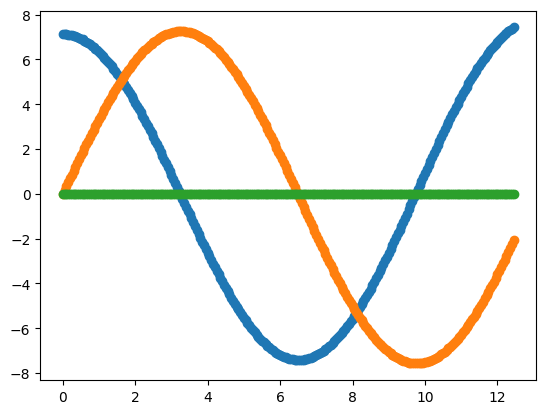

In [646]:
t  = arange(0, 12.5, 0.05) ## time-array (collection of all time-points measured by detector)
x0 = array([7.1234,0.,0.]) ## start solely on the 0-axis
v0 = array([0.,3.4567,0.]) ## initial-velocity (needed for rotational motion) on 1-axis

x_t, v_t, f_t = VelocityVerletRot(t, x0=x0, v0=v0) ## using my method for rotational-motion (defined above)

plt.scatter(t, x_t[:,0]) ## 0-axis plot
plt.scatter(t, x_t[:,1]) ## 1-axis plot
plt.scatter(t, x_t[:,2]) ## 2-axis plot
plt.show()

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'>  Let's get acquainted with rotational motion. </font>

#### <font color='Red'>  Lets define a time array to indicate all moment of time considered, i.e. as done in previous labs. And define an initial position, velocity, and particle mass. </font>

In [647]:
dt = 0.1  ## s (detector time resolution, time-step)
t0 = 0.0  ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

T = arange(t0, tf, dt)

x0 = array([0,0.,0.]) ## initial position
v0 = array([0.,0,0.]) ## initial-velocity
m    =  10.00   ## kg : mass of your particle
g    = -9.81    ## m/s/s : surface-gravity

#### <font color='Red'>  Let's begin with Lab 2's Velocity Verlet Method as implemented in $\S$2.4.1 (free fall motion). Feel-free to copy-n-paste your result from there into the code-cell below, and plot your dynamics showing that your code-cell works. </font>

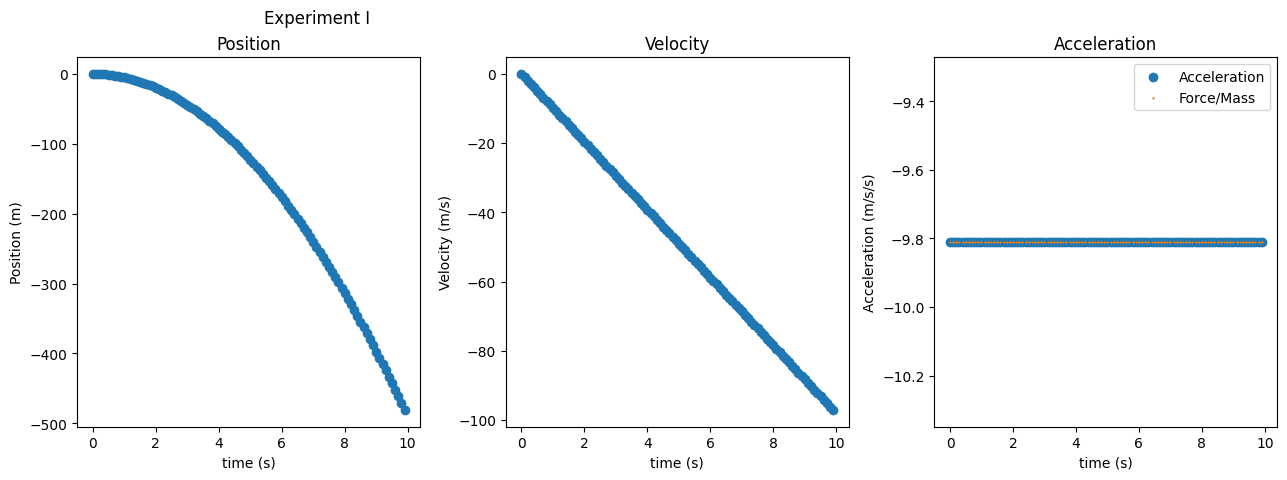

In [648]:
f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,0] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points

x_t = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
v_t = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
a_t = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

x_t[0] = x0 ## initialize the 0th position-trajectory entry to the initial-position
v_t[0] = v0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
a_t[0] = f_gravity[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  x_t[t] = x_t[t-1] + v_t[t-1] * dt + 0.5 * a_t[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  a_t[t] = f_gravity[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration

dRdt_tx = d(x_t)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(v_t)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, v_t[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, a_t[:,0], label="Acceleration")
ax3.scatter(T, f_gravity[:,0]/m, s=0.5, label="Force/Mass")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

### <font color='Red'>  Next copy-n-paste the earlier VelocityVerlet algorthim but with a modification: </font>
```
a_t[t] = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )
```
### <font color='Red'> use this to our equations-of-motion, and obtain a trajectory and accelerations.</font>

### <font color='Red'> I.e. implement Velocity Verlet with the Centripetal acceleration. </font>

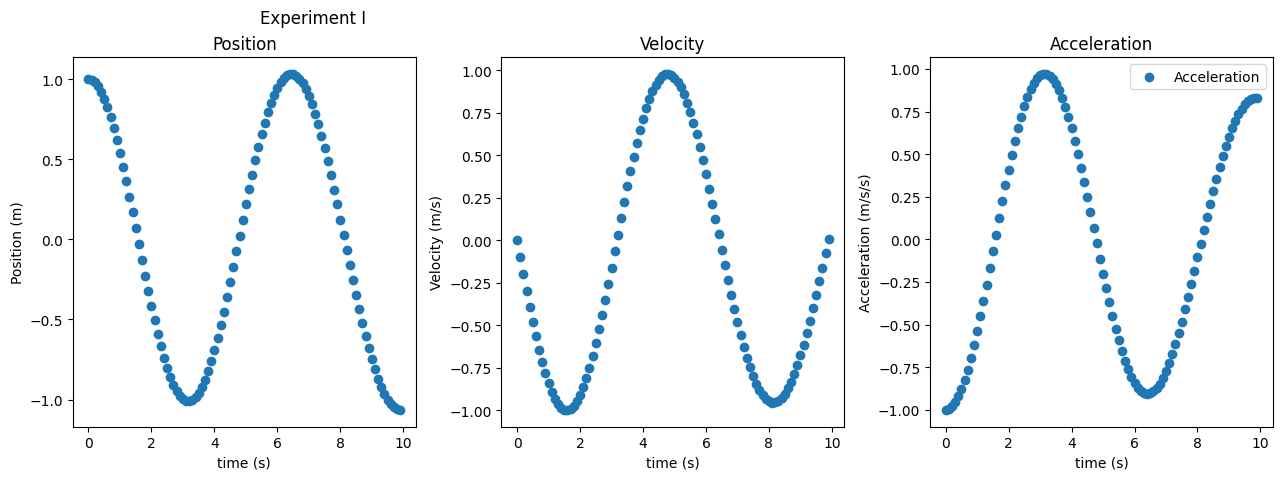

In [649]:
# Parameters
dt = 0.1  # Time step (s)
t0 = 0.0  # Initial time (s)
tf = 10.0  # Final time (s)
T = np.arange(t0, tf, dt)  # Time array

m = 1.0  # Mass of the particle (kg)
x0 = np.array([1.0, 0.0, 0.0])  # Initial position (m)
v0 = np.array([0.0, 1.0 , 0.0])  # Initial velocity (m/s)

x_t = np.zeros((len(T), 3))  # Position trajectory
v_t = np.zeros((len(T), 3))  # Velocity trajectory
a_t = np.zeros((len(T), 3))  # Acceleration trajectory

x_t[0] = x0  # Initialize position
v_t[0] = v0  # Initialize velocity
a_t[0] = -np.dot(v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * (x_t[0] - np.zeros(3))

for t in range(1, len(T)):  # Velocity Verlet loop
    x_t[t] = x_t[t-1] + v_t[t-1] * dt + 0.5 * a_t[t-1] * dt*dt  # Position update
    a_t[t] = -np.dot(v_t[t-1], v_t[t-1]) / (np.linalg.norm(x_t[t])**2) * (x_t[t] - np.zeros(3))  # Modified acceleration
    v_t[t] = v_t[t-1] + 0.5 * (a_t[t-1] + a_t[t]) * dt  # Velocity update

dRdt_tx = np.gradient(x_t, dt, axis=0)  # Numerical time derivative of position
dVdt_tx = np.gradient(v_t, dt, axis=0)  # Numerical time derivative of velocity

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, x_t[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, v_t[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, a_t[:,0], label="Acceleration")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

The graphs above showing the position, velocity, and acceleration of a particle over time, simulated using the Velocity Verlet method for rotational motion under a central force. Each plot highlights how the particle's motion evolves based on the algorithm's integration of position and velocity respectively.

The position, velocity, and acceleration plots are linked because velocity is the derivative of position, and acceleration is the derivative of velocity. The simulation calculates these using the Velocity Verlet method, integrating acceleration to get velocity and velocity to get position.

Circular motion is related to trigonometric functions because the motion can be described using sine and cosine, which represent periodic oscillations. These functions naturally model the x and y coordinates of a particle moving in a circle over time.

####   <font color='Red'> Plot x(t), y(t), z(t) trajectories (in time) on 1 graph, be sure in include caption. Then Plot v_x(t), v_y(t), v_z(t) velocities (in time) on 1 graph, in conclusion explain this graph </font>

[Text(0.5, 0, 'time (s)'), Text(0, 0.5, 'Position (m)')]

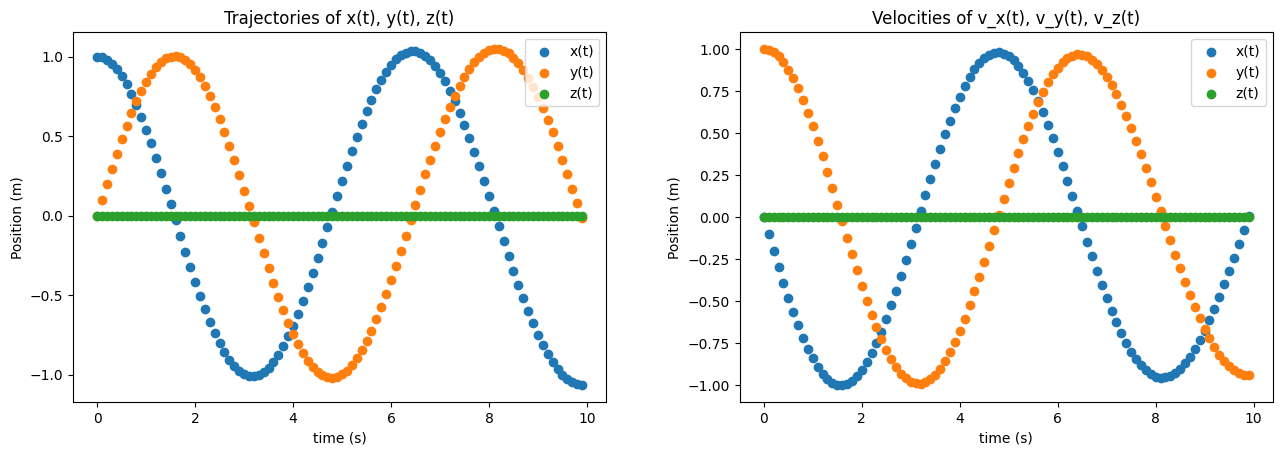

In [650]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)
ax1.scatter(T, x_t[:,0],label='x(t)')
ax1.scatter(T, x_t[:,1],label='y(t)')
ax1.scatter(T, x_t[:,2],label='z(t)')
ax1.legend(loc="upper right")
ax1.set_title("Trajectories of x(t), y(t), z(t)")
ax1.set(xlabel='time (s)', ylabel='Position (m)')


ax2.scatter(T, v_t[:,0],label='x(t)')
ax2.scatter(T, v_t[:,1],label='y(t)')
ax2.scatter(T, v_t[:,2],label='z(t)')
ax2.legend(loc="upper right")
ax2.set_title("Velocities of v_x(t), v_y(t), v_z(t)")
ax2.set(xlabel='time (s)', ylabel='Position (m)')

The position graph shows the particle's 3D path under a central force, while the velocity graph shows how the speed in each direction changes over time. Velocity, as the first derivative of position, describes how fast the position changes. The motion often follows trigonometric patterns, like sine and cosine, because the central force causes rotational or periodic behavior. Together, these graphs illustrate how position and velocity are connected through their rates of change and trigonometric relationships.

The left plot shows how the particle's position (x,y,z) changes over time, while the right plot shows the corresponding velocities. Circular motion creates these oscillating patterns because the x and y coordinates follow sine and cosine functions, which repeat periodically. The velocity oscillates similarly but is shifted in phase since velocity is the derivative of the position function.

###   <font color='Red'> Plot a parametric plot with x and y </font>

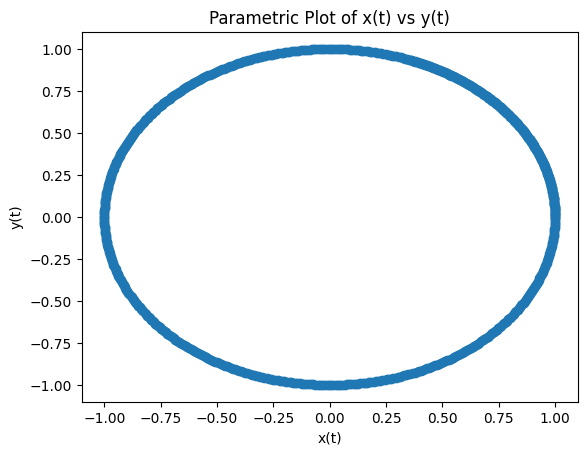

In [651]:
# Parameters
dt = 0.01  # Time step (s)
t0 = 0.0  # Initial time (s)
tf = 7.5  # Final time (s)
T = np.arange(t0, tf, dt)  # Time array

m = 3.0  # Mass of the particle (kg)
x0 = np.array([1.0, 0.0, 0.0])  # Initial position (m)
v0 = np.array([0.0, 1.0 , 0.0])  # Initial velocity (m/s)

x_t = np.zeros((len(T), 3))  # Position trajectory
v_t = np.zeros((len(T), 3))  # Velocity trajectory
a_t = np.zeros((len(T), 3))  # Acceleration trajectory

x_t[0] = x0  # Initialize position
v_t[0] = v0  # Initialize velocity
a_t[0] = -np.dot(v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * (x_t[0] - np.zeros(3))

for t in range(1, len(T)):  # Velocity Verlet loop
    x_t[t] = x_t[t-1] + v_t[t-1] * dt + 0.5 * a_t[t-1] * dt*dt  # Position update
    a_t[t] = -np.dot(v_t[t-1], v_t[t-1]) / (np.linalg.norm(x_t[t])**2) * (x_t[t] - np.zeros(3))  # Modified acceleration
    v_t[t] = v_t[t-1] + 0.5 * (a_t[t-1] + a_t[t]) * dt  # Velocity update

dRdt_tx = np.gradient(x_t, dt, axis=0)  # Numerical time derivative of position
dVdt_tx = np.gradient(v_t, dt, axis=0)  # Numerical time derivative of velocity

# Parametric plot for x and y

plt.scatter(x_t[:,0], x_t[:,1]) ## 0-axis plot(x_t[:, 0], x_t[:, 1], label='Parametric x(t) vs y(t)')
plt.title('Parametric Plot of x(t) vs y(t)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.show()




Parametric plot showing the trajectory of the particle in the
x(t) and y(t) plane.

The plot shows the particle's path in two dimensions, tracing its motion over time. More time data points are needed, then the previous scatter graph, because smaller time steps reduce numerical errors in the simulation. If the time steps are too large, errors can accumulate, causing the circular motion to spiral outward instead of staying on the correct path.

#   <font color='Red'> **Experiment 2**  </font>

### <font color='Red'>  Let's now implment the  *for-loop over object configurations*; by **varying the velocity**, keeping the objects mass and radius fixed. You may use the VelocityVerletRot method defined above. </font>



#### <font color='Red'> Specify a range of speeds, you'd like to test. And an empty array of what you'd like to measure, i.e. the force (of the same length of the array of speeds). </font>

In [652]:
v_range = arange(0.1, 3, 0.1) #range of speeds from 0.1 m/s to 3 m/s at .1m/s intervals


#### <font color='Red'> Setup a time-array like before to test the dynamics.  </font>

In [653]:
# Parameters
dt = 0.01  # Time step (s)
t0 = 0.0  # Initial time (s)
tf = 3  # Final time (s)

TT = np.arange(t0, tf, dt)  # Time array

#### <font color='Red'> Let's run the for-loop, over the velocities we wish to experiment over. </font>

In [654]:
f_v = np.zeros(len(v_range)) #empty array of same length as v_range

for i in range(len(v_range)): #for loop over all speeds in v_range
  vi = v_range[i] * np.array([0,1.,0]) #set the current speed to vi
  x_t, v_t, f_t = VelocityVerletRot(TT, x0=np.array([1.,0.,0.]), v0=vi, mass=1.,)
  f = np.linalg.norm(f_t, axis=1)
  f_avg = np.sum(f)/len(f)

  f_v[i] = f_avg

#### <font color='Red'> Plot your data: F vs. v </font>

Text(0, 0.5, 'Force (N)')

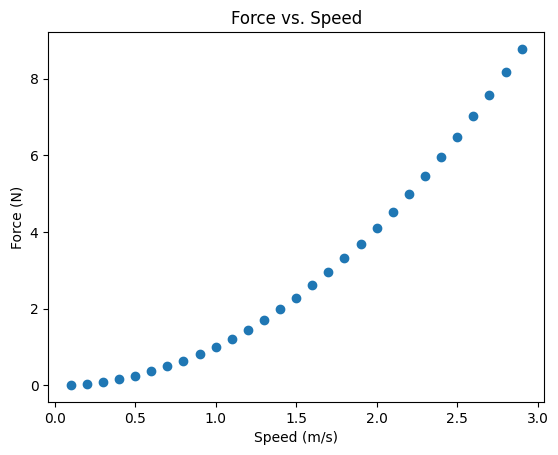

In [655]:
plt.scatter(v_range, f_v)
plt.title('Force vs. Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Force (N)')

This scatter plot illustrates the relationship between the particle’s speed and the average force acting on it. Each data point represents the average force calculated for a specific velocity, showing how force varies with increasing speed. This trend provides insight into the underlying physical laws, such as the proportionality of force to velocity.

#### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = v$^2$). And print the values of m and c with units. </font>

In [656]:
def linearfit(x,y):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(A, y, rcond=None)[0]

m, c = linearfit(v_range, sqrt(f_v))

print(m)
print(c)


1.021734755248275
-0.0139144015591385


### <font color='Red'> Get the theoritical slope ratio, e.g. m/R, and print it with units how does it compare with your linear fit? </font>

Text(0, 0.5, 'Force (N)')

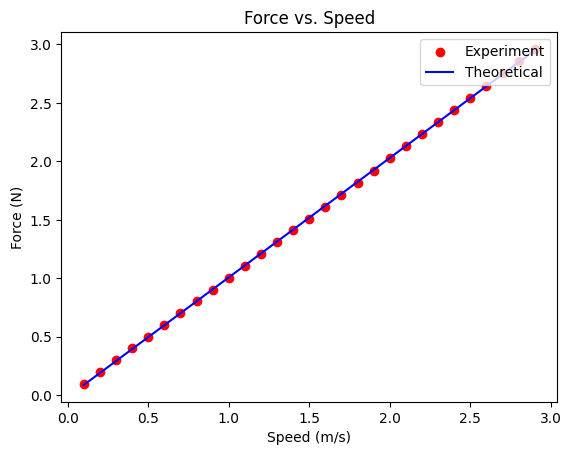

In [657]:
plt.scatter(v_range, sqrt(f_v),label='Experiment', color = 'red')
plt.plot(v_range, m*v_range + c,label='Theoretical', color = 'blue')
plt.legend(loc="upper right")
plt.title('Force vs. Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Force (N)')

This plot compares the square root of the experimental force data (red points) with a linear fit (blue line). The linear relationship suggests a direct proportionality between the square root of force and velocity, consistent with theoretical predictions for this system. The alignment between the data and the linear fit validates the simulation and reinforces the assumption of linear scaling.

#### <font color='Red'> Let's plot this linear function (in F vs. v^2): data, simulation-fit, and theory-fit </font>

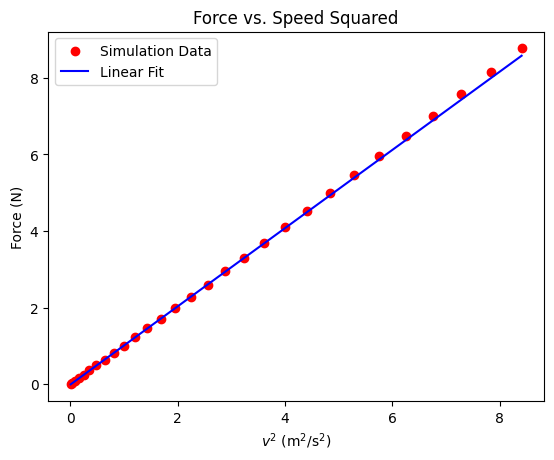

In [658]:
plt.scatter(v_range**2, f_v, label='Simulation Data', color='red')
plt.plot(v_range**2, m * v_range**2 + c, label='Linear Fit', color='blue')
plt.title('Force vs. Speed Squared')
plt.xlabel('$v^2$ (m$^2$/s$^2$)')
plt.ylabel('Force (N)')
plt.legend(loc="upper left")
plt.show()

This scatter plot examines the relationship between the average force and the square of the velocity. The red points represent the simulated data, while the blue line shows the linear fit. The observed quadratic dependence of force on velocity is consistent with physical models where the force scales with
v^2.

#   <font color='Red'> **Experiment 3** </font>

### <font color='Red'>  Let's now implment the *for-loop over object configurations*, but thiis time by **varying the Radius** of rotation, keeping the objects mass and velocity fixed. </font>

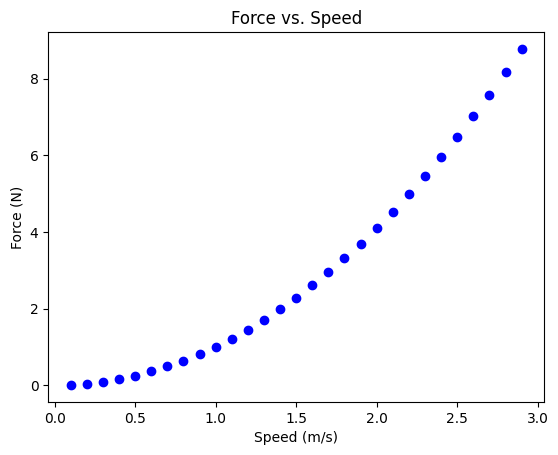

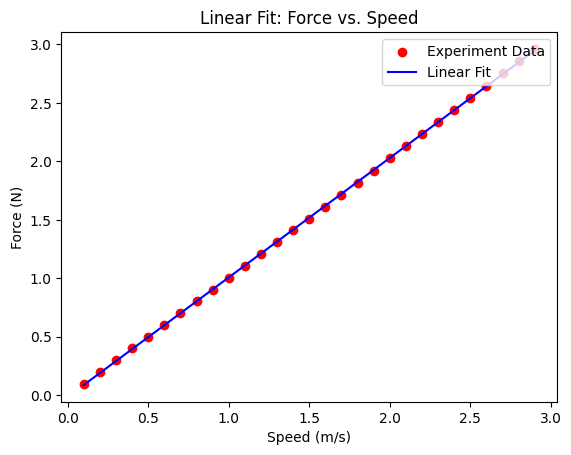

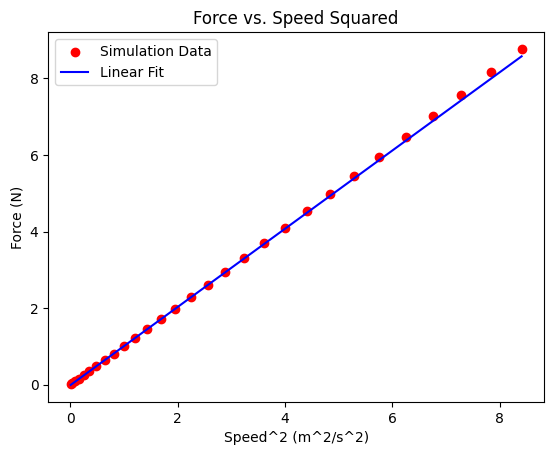

(1.021734755248275, -0.0139144015591385)

In [659]:
# Parameters
dt = 0.01  # Time step (s)
t0 = 0.0  # Initial time (s)
tf = 3  # Final time (s)
TT = np.arange(t0, tf, dt)  # Time array

v_range = np.arange(0.1, 3, 0.1)  # Speed range (0.1 m/s to 3 m/s with 0.1 intervals)
f_v = np.zeros(len(v_range))  # Empty array to store average forces



# Simulation loop
for i in range(len(v_range)):
    vi = v_range[i] * np.array([0, 1., 0])  # Current speed
    x_t, v_t, f_t = VelocityVerletRot(T=TT, x0=np.array([1., 0., 0.]), v0=vi, mass=1.)
    f = np.linalg.norm(f_t, axis=1)
    f_avg = np.sum(f) / len(f)  # Average force
    f_v[i] = f_avg

# Plot Force vs Speed
plt.scatter(v_range, f_v, label='Force vs Speed Data', color='blue')
plt.title('Force vs. Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Force (N)')
plt.show()

# Linear fit for sqrt(f_v)
def linearfit(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(A, y, rcond=None)[0]

m, c = linearfit(v_range, np.sqrt(f_v))

# Plot Linear Fit
plt.scatter(v_range, np.sqrt(f_v), label='Experiment Data', color='red')
plt.plot(v_range, m * v_range + c, label='Linear Fit', color='blue')
plt.legend(loc="upper right")
plt.title('Linear Fit: Force vs. Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Force (N)')
plt.show()

# Plot Force vs Speed Squared
plt.scatter(v_range**2, f_v, label='Simulation Data', color='red')
plt.plot(v_range**2, m * v_range**2 + c, label='Linear Fit', color='blue')
plt.legend(loc="upper left")
plt.title('Force vs. Speed Squared')
plt.xlabel('Speed^2 (m^2/s^2)')
plt.ylabel('Force (N)')
plt.show()

# Print Linear Fit Coefficients
m, c

### <font color='Red'> Define the time array, indicating all moments of time considered </font>

### <font color='Red'> For-loop over Radii considered </font>

### <font color='Red'> Plot the Radii vs. Force graph </font>

### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = 1/R). And print the values of m and c with units. </font>

### <font color='Red'> Get the theoritical slope ratio, e.g. m v^2, and print it with units how does it compare with your linear fit? </font>

#   <font color='Red'> **Conclusion** </font>

### <font color='Red'> Explain all graphs, and relevant physics invovled in the simulations. Explain the need for a good integration time step $\Delta$t. </font>

Write your Conclusion here

### <font color='Red'> Why is it called Uniform Circular Motion if there is acceleration? </font>

### <font color='Red'> In Circular Motion, where is the Acceleration and Velocity vector pointing at any given time? </font>